# Creating an elite squad of Pokemon based off types.
Pokemon has been around since the 90s and continues to see popularity even today. Out there is Pokemon competitions across many of the franchises games. As a result gamers are always looking for the optimal team set up. This usually results around the pokemon's overall stats and how little damage will the Pokemon take from attack Types. 

I'd like to explore the Pokemon from the last 8 generations and see if there's any Pokemon Types that stand out above the others.

To start I'd like to explain why Type is an important distinction in Pokemon. 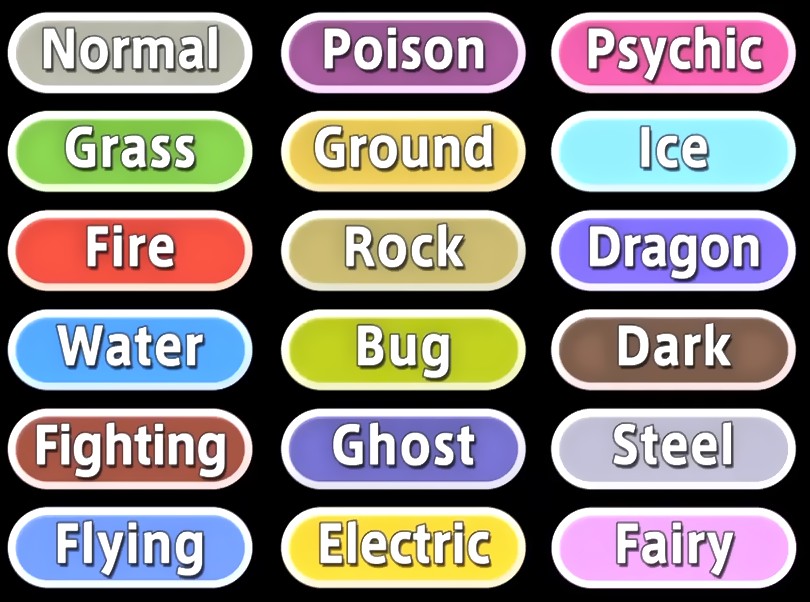





Type tells you what the Pokemon is at it's core. One that likes to be in the water or has electric properties. Pokemon can have one or more types but the one listed First is the most identifying of its types. This is an important distinction because more damage or less damage dealt is based off what types a Pokemon is weak or strong to. It has a larger effect than the defense stat. Its modifiers range from doing no damage to partial damage (25% of original) to doing up to 4x the normal amount. This has led to the super famous "It's super effective" catchprase.

 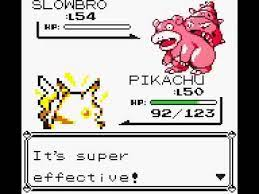

# Pokemon Stats

Pokemon stats are broken up into 5 different categories. Attack, Defense, Special Attack, Special Defense, and Speed. When added together, this creates an overall stat giving the full picture of how strong a particular Pokemon is. 

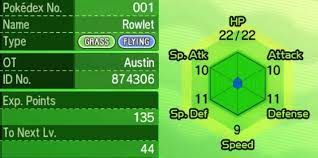

You'll notice I left out Hp in my description as this doesn't really matter a whole lot to the strength of a Pokemon just simply how much damage it can take which isn't what I'm curious about in this analysis.

# Why do these facts matter?
Upon realizing these facts about Pokemon, I started to ask some questions. What Pokemon type has the highest average overall stats? What about the most defensive type based off the least amount of Type damage? Are there any outliers that could make a certain types stand out above the rest and potentially break the game? These are the questions I'd like to explore with you today. 

# Where did the data come from?

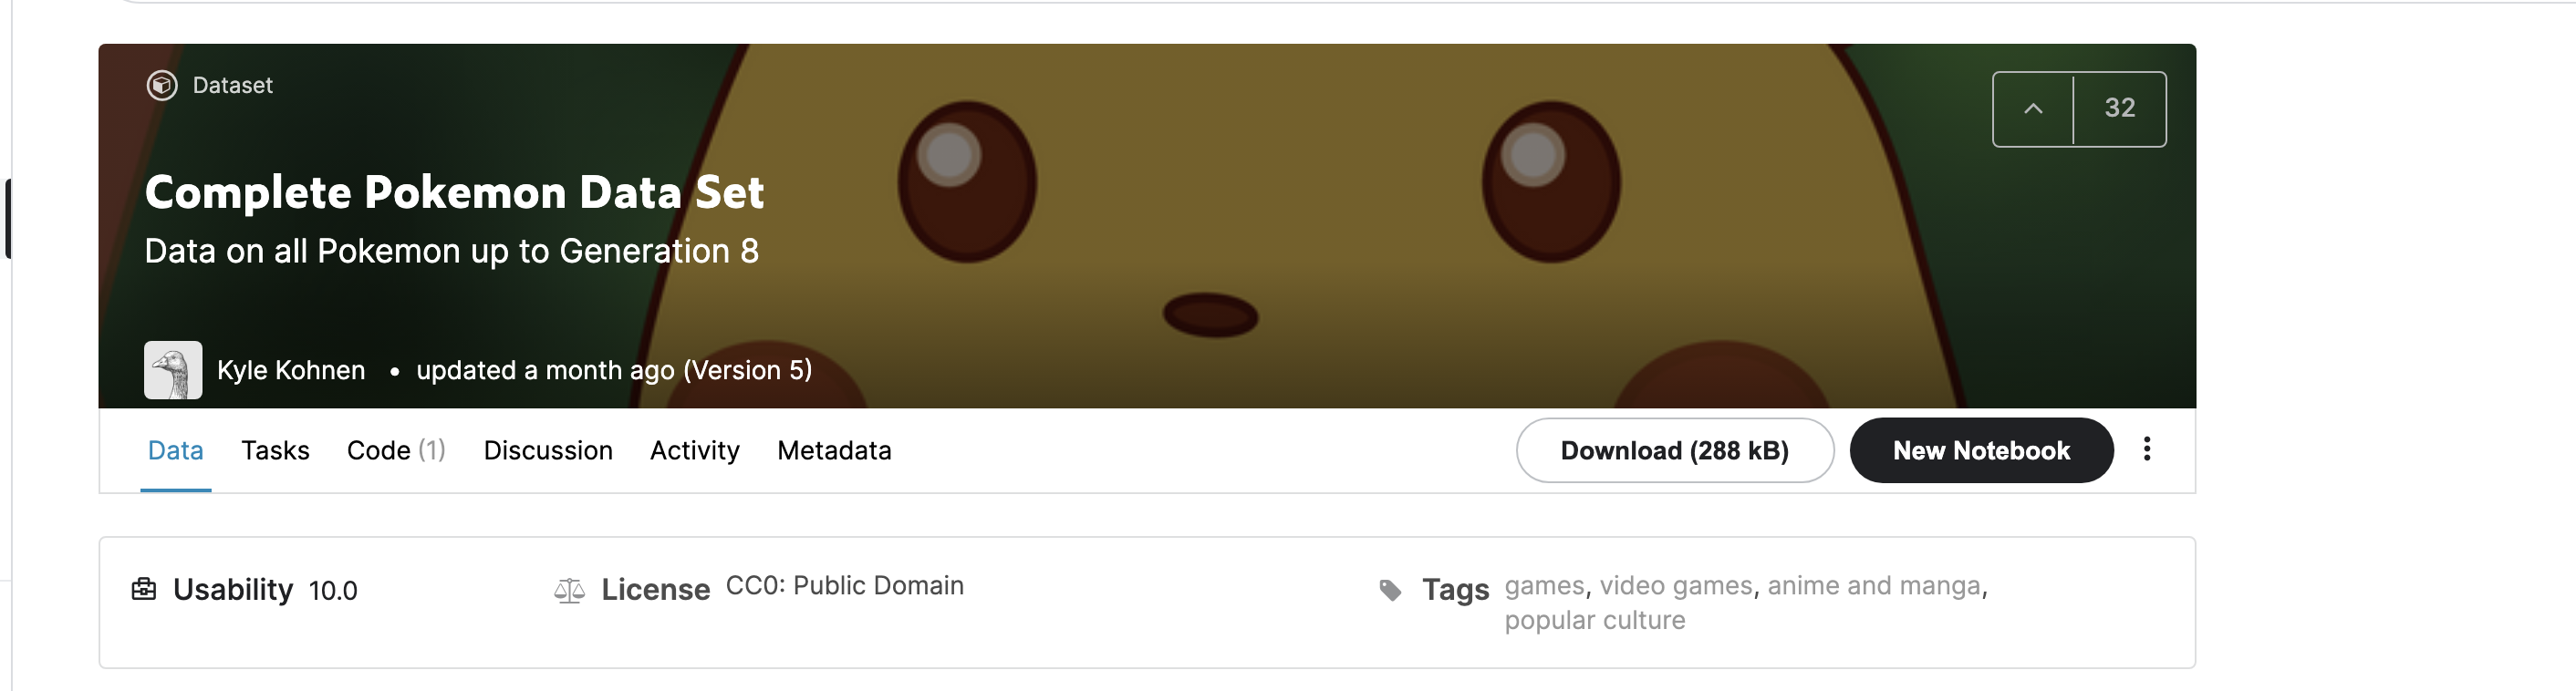

I pulled this Data set from Kaggle.com It was compiled by Kyle Kohnen and comes from PokeApI. He also got more from PokemonDB, Serebii, Bulbapedia, and PokeWiki. 

# Mounting our Data into Python

First, we'll need to get our data set into python and load the necessary packages

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/pokemon 2.csv')
attackeffectiveness = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/attackeffectiveness.csv')
overallstat = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/means_overallstat.csv')
#Let's make sure it's loading ok
df.head()

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,69,Seed Pokémon,1,0.125,False,False,False,False,True,False,64,45,Monster~Grass,20.0,70,True,NaN,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,130,Seed Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Grass,20.0,70,True,Bulbasaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125,False,False,False,False,True,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,240,10000,Seed Pokémon,1,0.125,False,False,False,False,False,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,24,1555,Seed Pokémon,1,0.125,False,False,False,False,False,True,281,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


# What are some basic facts about the data?

Let's start by seeing some basic facts about our data set.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing                         1118 non-null   object 
 4   hp                             1118 non-null   int64  
 5   attack                         1118 non-null   int64  
 6   defense                        1118 non-null   int64  
 7   special_attack                 1118 non-null   int64  
 8   special_defense                1118 non-null   int64  
 9   speed                          1118 non-null   int64  
 10  height                         1118 non-null   int64  
 11  weight                         1118 non-null   int64  
 12  genus                          1118 non-null   o

As we can see from our data, there's 48 columns. Only one has any non-null values in it the evolves from column. This makes sense because lowest level Pokemon don't have anything to evolve from. If we think back to the questions I wanted to look at today this column isn't relevant. The ones that are most relevant will be 5-9 and 31-48. These deal with the stats and the attack effectiveness for each pokemon. 

# Creating our overall_stat
Next, let's create a column that sums all of the stats in column 4-9 for each Pokemon. The second assignment we'll be using later.

In [4]:
df = df.assign(overall_stats = df.attack + df.defense + df.special_attack + df.special_defense + df.speed)
df = df.assign(overall_effectiveness = df.normal_attack_effectiveness + df.fire_attack_effectiveness + df.water_attack_effectiveness + df.electric_attack_effectiveness + df.grass_attack_effectiveness + df.ice_attack_effectiveness + df.fighting_attack_effectiveness + df.poison_attack_effectiveness + df.ground_attack_effectiveness + df.fly_attack_effectiveness + df.psychic_attack_effectiveness + df.bug_attack_effectiveness + df.rock_attack_effectiveness + df.ghost_attack_effectiveness + df.dragon_attack_effectiveness + df.dark_attack_effectiveness + df.steel_attack_effectiveness + df.fairy_attack_effectiveness)

In [5]:
df.head(2)

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,overall_stats,overall_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,69,Seed Pokémon,1,0.125,False,False,False,False,True,False,64,45,Monster~Grass,20.0,70,True,NaN,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,273,19.25
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,130,Seed Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Grass,20.0,70,True,Bulbasaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,345,19.25


Now we need to be able to filter and sort the data frame to show the data for our individual types. If you take a deeper look into the typing column you'll see that many pokemon have more than one type

In [6]:
df['typing'].value_counts()

Water              75
Normal             74
Electric           47
Psychic            45
Grass              45
                   ..
Psychic~Dragon      1
Fire~Rock           1
Ground~Electric     1
Normal~Water        1
Normal~Ground       1
Name: typing, Length: 192, dtype: int64

This means we'll have to use iloc with the str.startswith to get the Pokemon grouped into there main types. Let's create 18 different sub data frames.

In [7]:
pokemon_type_bug = df.loc[df['typing'].str.startswith('Bug', na='False')]
pokemon_type_dark = df.loc[df['typing'].str.startswith('Dark', na='False')]
pokemon_type_dragon = df.loc[df['typing'].str.startswith('Dragon', na='False')]
pokemon_type_electric = df.loc[df['typing'].str.startswith('Electric', na='False')]
pokemon_type_fairy = df.loc[df['typing'].str.startswith('Fairy', na='False')]
pokemon_type_fighting = df.loc[df['typing'].str.startswith('Fighting', na='False')]
pokemon_type_fire = df.loc[df['typing'].str.startswith('Fire', na='False')]
pokemon_type_flying = df.loc[df['typing'].str.startswith('Flying', na='False')]
pokemon_type_ghost = df.loc[df['typing'].str.startswith('Ghost', na='False')]
pokemon_type_grass = df.loc[df['typing'].str.startswith('Grass', na='False')]
pokemon_type_ground = df.loc[df['typing'].str.startswith('Ground', na='False')]
pokemon_type_ice = df.loc[df['typing'].str.startswith('Ice', na='False')]
pokemon_type_normal = df.loc[df['typing'].str.startswith('Normal', na='False')]
pokemon_type_poison = df.loc[df['typing'].str.startswith('Poison', na='False')]
pokemon_type_psychic = df.loc[df['typing'].str.startswith('Psychic', na='False')]
pokemon_type_rock = df.loc[df['typing'].str.startswith('Rock', na='False')]
pokemon_type_steel = df.loc[df['typing'].str.startswith('Steel', na='False')]
pokemon_type_water = df.loc[df['typing'].str.startswith('Water', na='False')]

pokemon_type_dragon.value_counts()


name            pokedex_number  abilities                           typing           hp   attack  defense  special_attack  special_defense  speed  height  weight  genus                gen_introduced  female_rate  genderless  baby_pokemon  legendary  mythical  is_default  forms_switchable  base_experience  capture_rate  egg_groups        egg_cycles  base_happiness  can_evolve  evolves_from  primary_color  shape      number_pokemon_with_typing  normal_attack_effectiveness  fire_attack_effectiveness  water_attack_effectiveness  electric_attack_effectiveness  grass_attack_effectiveness  ice_attack_effectiveness  fighting_attack_effectiveness  poison_attack_effectiveness  ground_attack_effectiveness  fly_attack_effectiveness  psychic_attack_effectiveness  bug_attack_effectiveness  rock_attack_effectiveness  ghost_attack_effectiveness  dragon_attack_effectiveness  dark_attack_effectiveness  steel_attack_effectiveness  fairy_attack_effectiveness  overall_stats  overall_effectiveness
Sliggoo  

Things are looking pretty good. Let's do a describe on each of the 18 types and see what results we get on overall stats.

# Descriptive Stats on Overall Stat by Main Type

---



In [40]:
pokemon_type_bug["overall_stats"].describe()

count     85.000000
mean     331.082353
std      106.820300
min      150.000000
25%      245.000000
50%      335.000000
75%      423.000000
max      535.000000
Name: overall_stats, dtype: float64

In [58]:
pokemon_type_dark["overall_stats"].describe()

count     48.000000
mean     364.979167
std       95.119072
min      185.000000
25%      297.250000
50%      375.000000
75%      425.500000
max      554.000000
Name: overall_stats, dtype: float64

In [59]:
pokemon_type_dragon["overall_stats"].describe()

count     43.000000
mean     453.790698
std      122.094530
min      242.000000
25%      357.000000
50%      492.000000
75%      530.000000
max      675.000000
Name: overall_stats, dtype: float64

In [60]:
pokemon_type_electric["overall_stats"].describe()

count     77.000000
mean     371.181818
std       90.974653
min      185.000000
25%      285.000000
50%      387.000000
75%      430.000000
max      520.000000
Name: overall_stats, dtype: float64

In [61]:
pokemon_type_fairy["overall_stats"].describe()

count     24.000000
mean     373.583333
std      122.155253
min      168.000000
25%      262.000000
50%      374.500000
75%      440.500000
max      628.000000
Name: overall_stats, dtype: float64

In [62]:
pokemon_type_fighting["overall_stats"].describe()

count     45.000000
mean     377.800000
std      100.235768
min      165.000000
25%      320.000000
50%      400.000000
75%      445.000000
max      628.000000
Name: overall_stats, dtype: float64

In [63]:
pokemon_type_fire["overall_stats"].describe()

count     69.000000
mean     387.811594
std       90.047255
min      210.000000
25%      320.000000
50%      400.000000
75%      456.000000
max      574.000000
Name: overall_stats, dtype: float64

In [64]:
pokemon_type_flying["overall_stats"].describe()

count      9.000000
mean     373.333333
std      113.152552
min      205.000000
25%      297.000000
50%      397.000000
75%      450.000000
max      501.000000
Name: overall_stats, dtype: float64

In [65]:
pokemon_type_ghost["overall_stats"].describe()

count     46.000000
mean     383.304348
std       85.421275
min      225.000000
25%      287.250000
50%      412.000000
75%      439.750000
max      540.000000
Name: overall_stats, dtype: float64

In [66]:
pokemon_type_grass["overall_stats"].describe()

count     96.000000
mean     354.812500
std       93.421322
min      150.000000
25%      269.000000
50%      365.500000
75%      424.750000
max      560.000000
Name: overall_stats, dtype: float64

In [67]:
pokemon_type_ground["overall_stats"].describe()

count     42.000000
mean     362.142857
std       99.391213
min      240.000000
25%      265.000000
50%      370.000000
75%      423.000000
max      670.000000
Name: overall_stats, dtype: float64

In [68]:
pokemon_type_ice["overall_stats"].describe()

count     39.000000
mean     362.000000
std       92.399875
min      155.000000
25%      265.000000
50%      395.000000
75%      426.000000
max      500.000000
Name: overall_stats, dtype: float64

In [69]:
pokemon_type_normal["overall_stats"].describe()

count    118.000000
mean     326.771186
std       97.503926
min      120.000000
25%      250.000000
50%      330.000000
75%      395.750000
max      600.000000
Name: overall_stats, dtype: float64

In [70]:
pokemon_type_poison["overall_stats"].describe()

count     43.000000
mean     362.511628
std      114.467166
min      205.000000
25%      271.000000
50%      385.000000
75%      413.500000
max      870.000000
Name: overall_stats, dtype: float64

In [71]:
pokemon_type_psychic["overall_stats"].describe()

count     80.000000
mean     416.150000
std      128.986321
min      157.000000
25%      302.000000
50%      416.500000
75%      508.750000
max      674.000000
Name: overall_stats, dtype: float64

In [72]:
pokemon_type_rock["overall_stats"].describe()

count     73.000000
mean     386.506849
std       87.513511
min      210.000000
25%      330.000000
50%      398.000000
75%      440.000000
max      650.000000
Name: overall_stats, dtype: float64

In [73]:
pokemon_type_steel["overall_stats"].describe()

count     40.000000
mean     415.450000
std      100.221281
min      240.000000
25%      367.500000
50%      434.000000
75%      477.000000
max      620.000000
Name: overall_stats, dtype: float64

In [74]:
pokemon_type_water["overall_stats"].describe()

count    141.000000
mean     364.035461
std       98.107551
min      130.000000
25%      275.000000
50%      380.000000
75%      429.000000
max      670.000000
Name: overall_stats, dtype: float64

# Results of the descriptive analystics

After combing through all of the means of the types. It appears that the winner is Dragon Type with an average overall stat of 453.7 followed by Psychic at 416.15. Here's a bar chart showing all of the types.

Text(0.5, 1.0, 'Pokemon Type by Stat')

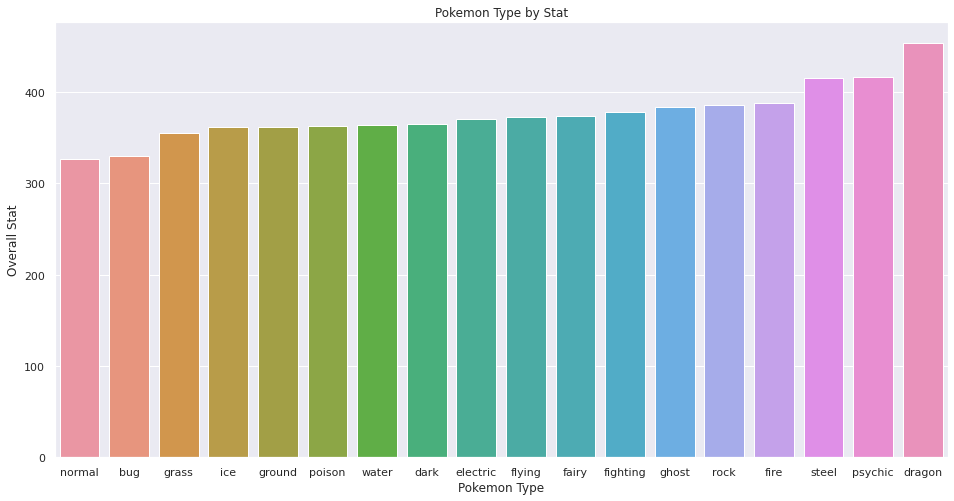

In [41]:
plt.figure(figsize= (16, 8))
sns.barplot(x='Type', y='overall_stats', data= overallstat)
plt.xlabel('Pokemon Type')
plt.ylabel('Overall Stat')
plt.title('Pokemon Type by Stat')

We can see it appears fairly even no super crazy outliers. But until we put it to the test we can't say for sure.

# Independent T-test

Now that we've identified our two best groups, we're going to see if there's a statistical difference between the overall stats. In order to make our formal hypothesis we'll be using the Null hypothesis and the Alternative hypothesis. 

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

The Ho means null hypothesis that the avg mean will equal 0. Ha is the alternative and states that in the avg mean isn't equal to 0 and is therefore statistically different. 

In [27]:
stats.ttest_ind(pokemon_type_dragon['overall_stats'], pokemon_type_psychic['overall_stats'])

Ttest_indResult(statistic=1.5719001963165145, pvalue=0.11858498156970111)

As we can see from our test the p value is > .05 and so we'll be failing to reject the null hypothesis and there isn't a statistical difference in the overall stats of psychic and dragon. We can take this a step further and look at the confidence level to be absolutely sure.

In [28]:
sample_dragon_n = pokemon_type_dragon.shape[0]
sample_psychic_n = pokemon_type_psychic.shape[0]
sample_dragon_mean = pokemon_type_dragon['overall_stats'].mean()
sample_psychic_mean = pokemon_type_psychic['overall_stats'].mean()
sample_dragon_var = pokemon_type_dragon['overall_stats'].var()
sample_psychic_var = pokemon_type_psychic['overall_stats'].var()

import math
std_err_difference = math.sqrt((sample_dragon_var/sample_dragon_n)+(sample_psychic_var/sample_psychic_n))

mean_difference = sample_psychic_n - sample_dragon_n

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = meam_difference = margin_of_error
print(std_err_difference)
print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

23.55089234392268
The difference in means at the 95% confidence interval is between -9.159748994088453 and 46.15974899408845.


Text(0.5, 1.0, 'Pokemon Type by Stat')

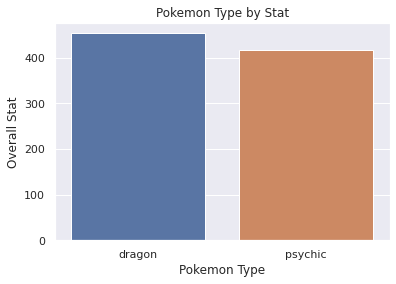

In [55]:
sns.barplot(x='Type', y='overall_stats', data=overallstat, order=['dragon', 'psychic'], ci=std_err_difference)
plt.xlabel('Pokemon Type')
plt.ylabel('Overall Stat')
plt.title('Pokemon Type by Stat')


In [30]:
stats.ttest_ind(pokemon_type_dragon['overall_stats'], pokemon_type_fire['overall_stats'])

Ttest_indResult(statistic=3.2822869338592793, pvalue=0.001380484209907086)

In [31]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(pokemon_type_fire['overall_stats'], pokemon_type_dragon['overall_stats'])


'The difference in means at the 95% confidence interval (two-tail) is between 23.750733842573517 and 108.20747310046656.'

Reject the null hypothesis that there is no statistical difference. At a p value of >.05 the difference is significant. Additionally, with 95% confidence we'll see a margin of error between 23.7 and 108.2

Text(0.5, 1.0, 'Pokemon Type by Stat')

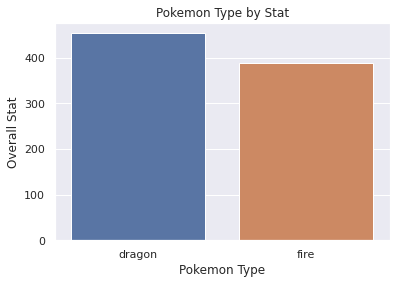

In [56]:
sns.barplot(x='Type', y='overall_stats', data=overallstat, order=['dragon', 'fire'], ci=std_err_difference)
plt.xlabel('Pokemon Type')
plt.ylabel('Overall Stat')
plt.title('Pokemon Type by Stat')

When doing this test again on Fire and Dragon,
we see the p value is <.05 so we reject the null that there is no difference in the mean values of our types stats. We can see from the barplot that the error lines don't cross this time showing a significant difference as well. 

# Which type is the best in terms of being able to take a hit based on type effectiveness?

Now we're ready to answer our second question which is, Is there a difference in mean overall attack effectiveness? This time we need to add up all the attack effectiveness to get an overall score. This time the lower the score the better.

In [33]:
df = df.assign(overall_effectiveness = df.normal_attack_effectiveness + df.fire_attack_effectiveness + df.water_attack_effectiveness + df.electric_attack_effectiveness + df.grass_attack_effectiveness + df.ice_attack_effectiveness + df.fighting_attack_effectiveness + df.poison_attack_effectiveness + df.ground_attack_effectiveness + df.fly_attack_effectiveness + df.psychic_attack_effectiveness + df.bug_attack_effectiveness + df.rock_attack_effectiveness + df.ghost_attack_effectiveness + df.dragon_attack_effectiveness + df.dark_attack_effectiveness + df.steel_attack_effectiveness + df.fairy_attack_effectiveness)

In [34]:
df.head()

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,overall_stats,overall_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,69,Seed Pokémon,1,0.125,False,False,False,False,True,False,64,45,Monster~Grass,20.0,70,True,NaN,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,273,19.25
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,130,Seed Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Grass,20.0,70,True,Bulbasaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,345,19.25
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125,False,False,False,False,True,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,445,19.25
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,240,10000,Seed Pokémon,1,0.125,False,False,False,False,False,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,445,19.25
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,24,1555,Seed Pokémon,1,0.125,False,False,False,False,False,True,281,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,545,19.25


All the way at the end we can see the column overall_effectiveness. If you recall earlier we already made our spliced data frames so we don't have to re-code those we can start going into our analysis. 

Text(0.5, 1.0, 'Pokemon Type by Attack Effectiveness')

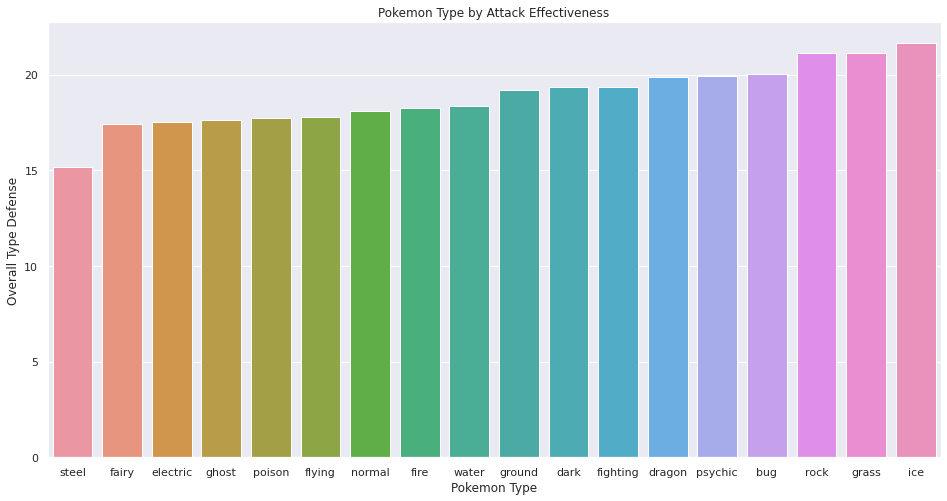

In [54]:
plt.figure(figsize= (16, 8))
sns.barplot(x='Type', y='overall_attack_effectiveness', data=attackeffectiveness, order=attackeffectiveness.sort_values('overall_attack_effectiveness').Type)
plt.xlabel('Pokemon Type')
plt.ylabel('Overall Type Defense')
plt.title('Pokemon Type by Attack Effectiveness')

Our graph is telling us most of the types are pretty even. Though Steel is noticeably lower on the graph at least. Fairy seems quite distant from steel. Another interesting observation is that our champion in stats Dragon is on the higher end surprisingly along with psychic. Which lends itself to pretty good balance. 

# Independent T-Test

Once again it's time to form our hypothesis.

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

The question this time is the mean overall attack effectiveness between our two lowest types equal to 0 or is the alternative hypothesis that they aren't equivalent to 0 true and we reject our null hypothesis?

In [36]:
stats.ttest_ind(pokemon_type_fairy['overall_effectiveness'], pokemon_type_steel['overall_effectiveness'])

Ttest_indResult(statistic=6.317753691266465, pvalue=3.2096276105632606e-08)

In [37]:
get_95_ci(pokemon_type_steel['overall_effectiveness'], pokemon_type_fairy['overall_effectiveness'])

'The difference in means at the 95% confidence interval (two-tail) is between 1.6139955884886854 and 2.836004411511314.'

# Results

This time we get a different result.
With a P-value of <.05 we will reject the null hypothesis that there is no significant difference between the mean overall_effectiveness. And with 95% confidence our margin of error will show no overlap on the bar plot indicating a significant difference between Steel types and Fairy types. 

Text(0.5, 1.0, 'Pokemon Type by Attack Effectiveness')

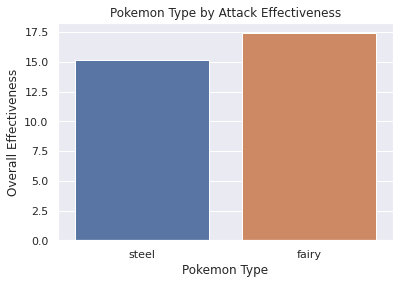

In [57]:
sns.barplot(x='Type', y='overall_attack_effectiveness', data=attackeffectiveness, order=['steel', 'fairy'], ci=std_err_difference)
plt.xlabel('Pokemon Type')
plt.ylabel('Overall Effectiveness')
plt.title('Pokemon Type by Attack Effectiveness')

# Conclusion

At this point you might be wondering what is the takeaway from all of this? 
From what I've discovered overall stats won't make a big difference in your team unless your opponent is using a fire or lower avg mean type. Even still, when factored that our overall stats had some of the weakest defense against types it's safe to say Dragon types won't automatically win you a match.

However, if we recall from our graph on stats steel types were still in the top 3. So my recommendation would be a steel-dragon/psychic as a potential power house. Especially when you have no foresight of your opponents roster ahead of time. 

In [39]:
pokemon_type_steel.sort_values('overall_stats', ascending=False).head(20)

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,overall_stats,overall_effectiveness
476,Metagross Mega,376,Tough Claws,Steel~Psychic,80,145,150,105,110,110,25,9429,Iron Leg Pokémon,3,0.0,True,False,False,False,False,True,315,3,Mineral,40.0,35,False,Metang,Blue,Heads,9.0,0.50,2.0,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.50,0.25,1.00,0.50,2.0,0.5,2.0,0.5,0.5,620,16.25
603,Dialga,483,Pressure~Telepathy,Steel~Dragon,100,120,120,150,100,90,54,6830,Temporal Pokémon,4,0.0,True,False,True,False,True,False,306,3,Undiscovered,120.0,0,False,NaN,White,Quadruped,2.0,0.50,1.0,0.5,0.5,0.25,1.0,2.0,0.0,2.0,0.50,0.50,0.50,0.50,1.0,1.0,1.0,0.5,1.0,580,14.25
393,Aggron Mega,306,Filter,Steel,70,140,230,60,80,50,22,3950,Iron Armor Pokémon,3,0.5,False,False,False,False,False,True,284,45,Monster,35.0,35,False,Lairon,Gray,Upright,11.0,0.50,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,0.50,0.50,0.50,0.50,1.0,0.5,1.0,0.5,0.5,560,15.00
281,Steelix Mega,208,Sand Force,Steel~Ground,75,125,230,55,95,30,105,7400,Iron Snake Pokémon,2,0.5,False,False,False,False,False,True,214,25,Mineral,25.0,70,False,Onix,Gray,Squiggle,6.0,0.50,2.0,2.0,0.0,1.00,1.0,2.0,0.0,2.0,0.50,0.50,0.50,0.25,1.0,0.5,1.0,0.5,0.5,535,15.75
475,Metagross,376,Clear Body~Light Metal,Steel~Psychic,80,135,130,95,90,70,16,5500,Iron Leg Pokémon,3,0.0,True,False,False,False,True,True,270,3,Mineral,40.0,35,False,Metang,Blue,Heads,9.0,0.50,2.0,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.50,0.25,1.00,0.50,2.0,0.5,2.0,0.5,0.5,520,16.25
989,Magearna,801,Soul Heart,Steel~Fairy,80,95,115,130,115,65,10,805,Artificial Pokémon,7,0.0,True,False,False,True,True,False,270,3,Undiscovered,120.0,0,False,NaN,Gray,Humanoid,5.0,0.50,2.0,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.50,0.50,0.25,0.50,1.0,0.0,0.5,1.0,0.5,520,13.25
990,Magearna Original,801,Soul Heart,Steel~Fairy,80,95,115,130,115,65,10,805,Artificial Pokémon,7,0.0,True,False,False,True,False,False,270,3,Undiscovered,120.0,0,False,NaN,Gray,Humanoid,5.0,0.50,2.0,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.50,0.50,0.25,0.50,1.0,0.0,0.5,1.0,0.5,520,13.25
490,Jirachi,385,Serene Grace,Steel~Psychic,100,100,100,100,100,100,3,11,Wish Pokémon,3,0.0,True,False,False,True,True,False,270,3,Undiscovered,120.0,100,False,NaN,Yellow,Humanoid,9.0,0.50,2.0,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.50,0.25,1.00,0.50,2.0,0.5,2.0,0.5,0.5,500,16.25
479,Registeel,379,Clear Body~Light Metal,Steel,80,75,150,75,150,50,19,2050,Iron Pokémon,3,0.0,True,False,True,False,True,False,261,3,Undiscovered,80.0,35,False,NaN,Gray,Humanoid,11.0,0.50,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,0.50,0.50,0.50,0.50,1.0,0.5,1.0,0.5,0.5,500,15.00
769,Cobalion,638,Justified,Steel~Fighting,91,90,129,90,72,108,21,2500,Iron Will Pokémon,5,0.0,True,False,True,False,True,False,261,3,Undiscovered,80.0,35,False,NaN,Blue,Quadruped,4.0,0.50,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.00,1.00,0.25,0.25,1.0,0.5,0.5,0.5,1.0,489,15.50


Sure enough if you glance at the top 20 steel types you'll see a lot of steel-dragon and steel-psychic types.

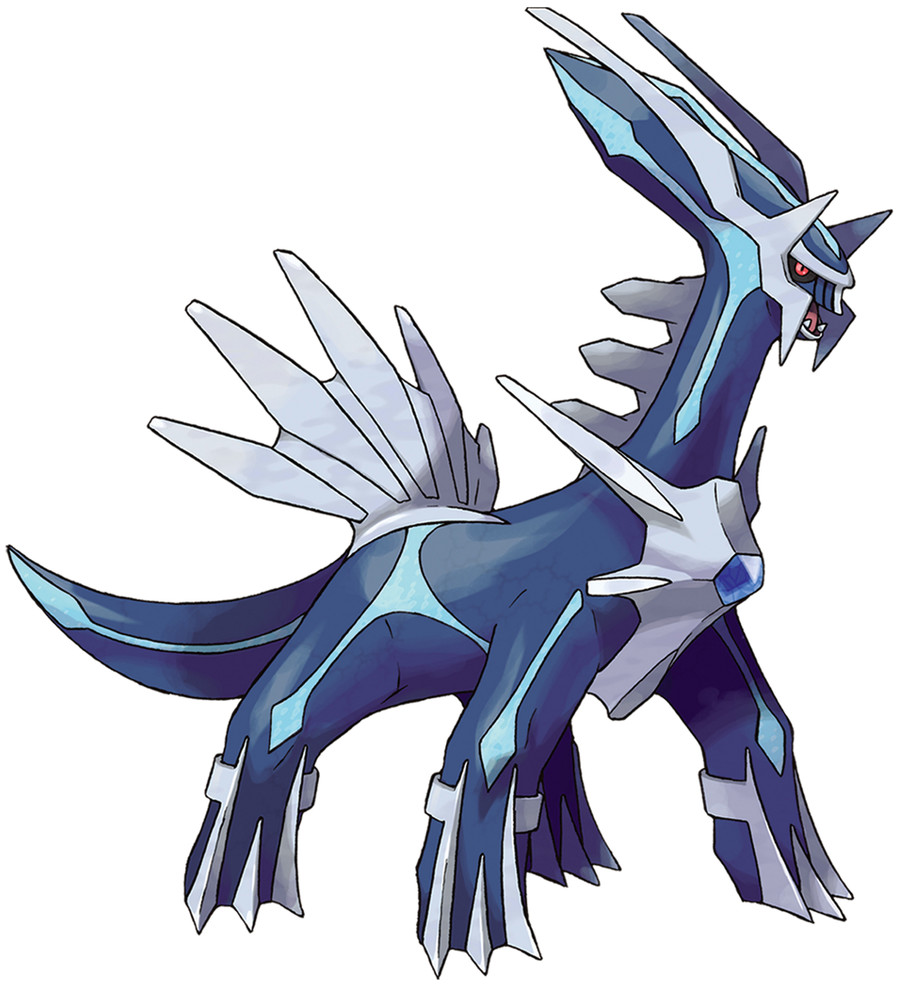

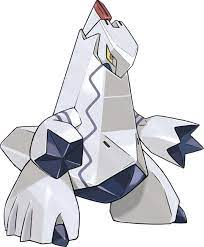

# Ok so these results are useful for competetive gamers is that all?

Most likely you're wondering if this really is all this useful. While for the most part it's just kinda fun to see all this laid out, the reality is game companies definetely keep an eye on insights like these. Especially online games. Players truly are amazing at finding all kinds of ways of breaking the games they play (look up zelda speed run) If developers aren't ensuring game stats aren't fair and balanced it can create all kinds of problems (or hysterical moments).

Thanks again for checking out My project outlining the power of the pokemon types!

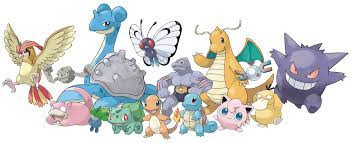